In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [586]:
from sklearn.datasets import make_regression

In [587]:
data=make_regression(1000,20,n_informative=15,noise=10)
x=pd.DataFrame(data[0])
y=pd.Series(data[1])

In [588]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

 ## Closed form solution of Linear Reg and Ridge Reg

In [589]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(1.0285534463516122,
 array([100.09964049,  -0.22128996,  64.39052715,  30.24127071,
         56.12727421,   0.12336893,   0.3602947 ,  72.50298345,
          7.70977614,  94.57202546,  96.0981693 ,  64.30834272,
         22.19190159,  93.10141607,  97.48578165,  57.17598711,
         58.63008735,  29.79260827,  -0.82752635,   0.28200604]))

In [590]:
x_sc=np.c_[np.ones(x.shape[0]),x]
reg_sc=np.linalg.inv(x_sc.T@x_sc) @ (x_sc.T@y.values.reshape(-1,1))
reg_sc[0],reg_sc[1:].flatten()

(array([1.02855345]),
 array([100.09964049,  -0.22128996,  64.39052715,  30.24127071,
         56.12727421,   0.12336893,   0.3602947 ,  72.50298345,
          7.70977614,  94.57202546,  96.0981693 ,  64.30834272,
         22.19190159,  93.10141607,  97.48578165,  57.17598711,
         58.63008735,  29.79260827,  -0.82752635,   0.28200604]))

In [591]:
rid_reg=Ridge(150,)
rid_reg.fit(x,y)
rid_reg.intercept_,rid_reg.coef_

(2.454355551303136,
 array([ 8.75291409e+01, -5.60518829e-02,  5.60462127e+01,  2.53076880e+01,
         4.91216236e+01,  7.52753022e-01,  1.23878478e-02,  6.27674774e+01,
         6.37264725e+00,  8.02820539e+01,  8.21940836e+01,  5.38761483e+01,
         2.03702797e+01,  8.07156092e+01,  8.41180502e+01,  4.85956587e+01,
         5.02299935e+01,  2.48225975e+01,  1.00492158e+00,  1.42327153e+00]))

In [592]:
rid_reg_sc=np.linalg.inv(x_sc.T@x_sc + np.identity(x_sc.shape[1])*150) @ (x_sc.T@y.values.reshape(-1,1))
rid_reg_sc[0],rid_reg_sc[1:].flatten()


(array([2.12633594]),
 array([ 8.75309350e+01, -5.71802790e-02,  5.60585309e+01,  2.53181320e+01,
         4.90906590e+01,  7.38701367e-01,  5.93710162e-03,  6.27710434e+01,
         6.37574828e+00,  8.02807071e+01,  8.22085213e+01,  5.38764409e+01,
         2.03767292e+01,  8.07206905e+01,  8.41285656e+01,  4.86154725e+01,
         5.02224532e+01,  2.48089733e+01,  1.01066465e+00,  1.43077864e+00]))

## Ridge Using Gradient Descent

In [593]:
def gradientdesc_ridge(*b,yi,xi,lam,tolerane,eta,verbose=False):
    mag=100
    xi=np.c_[[1 for _ in range(len(xi))],xi]
    while mag>tolerane:
        coef=np.array([*b]).reshape(-1,1)
        pred=xi
        error=yi.values.reshape(-1,1)-pred.dot(coef)
        a=[np.sum(error)]
        for i in range(1,xi.shape[1]):
            a.append(np.sum(error*xi[:,i].reshape(-1,1)))
        derv=np.array(a)
        new_co=(coef*(1-(2*eta*lam)))+(2*eta*derv.reshape(-1,1))#the online line that changes from LR GD
        if verbose==True:
            print(*new_co)
        ns=new_co
        b=ns.flatten()
        m=[]
        for z in derv:
            m.append(z**2)
        mag=np.sqrt(np.sum(m))
    return b

In [594]:
x=pd.DataFrame(data[0])
y=pd.Series(data[1])
ew=[0 for _ in range(x.shape[1]+1)]

In [595]:
#gradientdesc_ridge(ew,xi=x,yi=y,lam=150,tolerane=0.01,eta=0.0001,verbose=True)

In [596]:
def coordinate_descent_ridge(X,y,lam,alpha = .03, num_iters=20,normalize=False,verbose=False):
    if normalize==False:
        X=np.c_[np.ones(X.shape[0]),X]
        m,n = X.shape
        theta = np.zeros(n).reshape(-1,1)
        print(theta.flatten())
    
        for i in range(num_iters):
            for j in range(n):
                h = X @ theta 
                gradient =  ((X[:,j] @ (h-y))) + (lam*theta[j])
                theta[j] = theta[j] - alpha * gradient
                if verbose==True:
                    print(theta.flatten())
                       
        return theta.flatten()
    elif normalize==True:
        X=np.c_[np.ones(X.shape[0]),X]
        X = X / (np.linalg.norm(X,axis = 0)) 
        m,n = X.shape
        theta = np.zeros(n).reshape(-1,1)
        print(theta.flatten())
        for i in range(num_iters):
            for j in range(n):
                h = ((X[:,0:j] @ theta[0:j]) + (X[:,j+1:] @ theta[j+1:]))
                theta[j] =  (X[:,j] @ (y - h))/(1+lam)
                if verbose==True:
                    print(theta.flatten())
                       
    return theta.flatten()

In [597]:
coordinate_descent_ridge(x,y.values.reshape(-1,1),150,alpha = .00001, num_iters=1000,normalize=False,verbose=False)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([ 2.12818172e+00,  8.75307208e+01, -5.78399504e-02,  5.60572750e+01,
        2.53161558e+01,  4.90912361e+01,  7.39567044e-01,  6.21594832e-03,
        6.27692424e+01,  6.37579178e+00,  8.02757300e+01,  8.22058815e+01,
        5.38732795e+01,  2.03779618e+01,  8.07191149e+01,  8.41261944e+01,
        4.86120111e+01,  5.02206507e+01,  2.48069534e+01,  1.01344045e+00,
        1.43190963e+00])

In [598]:
rid_reg_sc[0],rid_reg_sc[1:].flatten()

(array([2.12633594]),
 array([ 8.75309350e+01, -5.71802790e-02,  5.60585309e+01,  2.53181320e+01,
         4.90906590e+01,  7.38701367e-01,  5.93710162e-03,  6.27710434e+01,
         6.37574828e+00,  8.02807071e+01,  8.22085213e+01,  5.38764409e+01,
         2.03767292e+01,  8.07206905e+01,  8.41285656e+01,  4.86154725e+01,
         5.02224532e+01,  2.48089733e+01,  1.01066465e+00,  1.43077864e+00]))

In [599]:
coordinate_descent_ridge(x,y.values.reshape(-1,1),150,alpha = .03, num_iters=20,normalize=True,verbose=False)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([ 2.36019171, 21.86621241,  0.52946377, 13.52035221,  5.15692161,
       12.28755012,  1.06728009, -0.62898294, 14.79200335,  0.92728779,
       17.60549295, 17.88454515,  9.60395249,  6.22077262, 19.23766195,
       19.23777305, 11.21014221, 11.28200063,  4.527116  ,  2.48615111,
        2.20462285])

In [600]:
#x_sc_1 = x_sc / (np.linalg.norm(x_sc,axis = 0)) 
#rid_reg_sc=np.linalg.inv(x_sc_1.T@x_sc_1 + np.identity(x_sc_1.shape[1])*150) @ (x_sc_1.T@y.values.reshape(-1,1))
#rid_reg_sc[0],rid_reg_sc[1:].flatten()

## LASSO from scratch using coordinate descent

In [601]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [602]:
Ridge()

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [603]:
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [604]:
x=pd.DataFrame(data[0])
y=pd.Series(data[1])
las_reg=Lasso(1)
las_reg.fit(x,y)
print(las_reg.score(x,y))
las_reg.intercept_,las_reg.coef_


0.9983442956151031


(1.1328929927830593,
 array([99.1472425 , -0.        , 63.32856138, 29.0468693 , 55.05130703,
         0.        ,  0.        , 71.49724763,  6.65436831, 93.34016527,
        94.94536142, 62.92397169, 21.44044334, 92.12006551, 96.40803979,
        56.04258298, 57.53852391, 28.69142134, -0.        ,  0.        ]))

In [605]:
def coordinate_descent_lasso(X,y,lam,alpha = .03, num_iters=20):
        X=np.c_[np.ones(X.shape[0]),X]
        m,n = X.shape
        theta = np.zeros(n).reshape(-1,1)
    
        for i in range(num_iters):
            for j in range(n):
                h = X @ theta 
                rho =  (2*(X[:,j] @ (h-y)))
                if j==0:
                  theta[j]=0
                else:
                  if rho<(-lam/2):
                    theta[j] = theta[j] - alpha *(rho-(lam/2))
                  elif rho>(lam/2):
                    theta[j] = theta[j] - alpha *(rho+(lam/2))
                  else:
                    theta[j]=0
        return theta.flatten()

In [606]:
coordinate_descent_lasso(x,y.values.reshape(-1,1),1,alpha = .0001, num_iters=700)

array([  0.        , 100.09277171,  -0.24520159,  64.38573302,
        30.15970787,  55.98736578,   0.13915371,   0.323858  ,
        72.4996663 ,   7.67838211,  94.51671735,  96.15272535,
        64.11130636,  22.20264098,  93.07703896,  97.51248274,
        57.20565353,  58.60661228,  29.67995806,  -0.78311946,
         0.30593151])

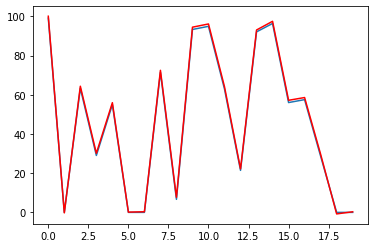

In [607]:
import matplotlib.pyplot as plt

a=coordinate_descent_lasso(x,y.values.reshape(-1,1),1,alpha = .0001, num_iters=700).reshape(-1,1)
plt.plot(las_reg.coef_)
plt.plot(coordinate_descent_lasso(x,y.values.reshape(-1,1),1,alpha = .0001, num_iters=700)[1:],'-r')

In [608]:
x=pd.DataFrame(data[0])
x=np.c_[np.ones(x.shape[0]),x]
y=pd.Series(data[1])
y_pred=(x@a)


In [609]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9985813961145383